Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0         

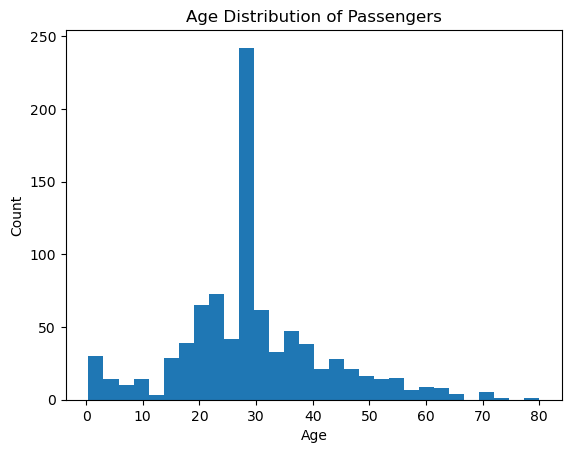

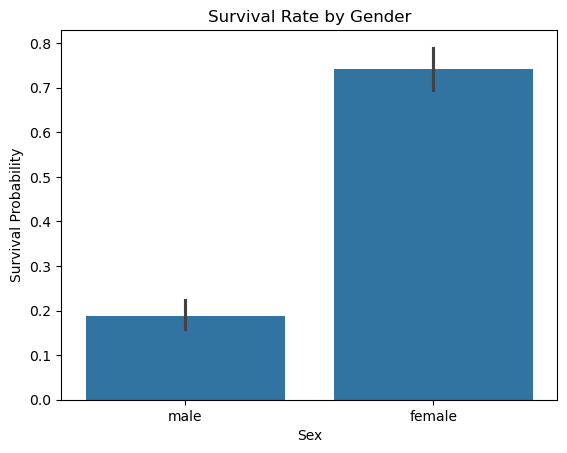

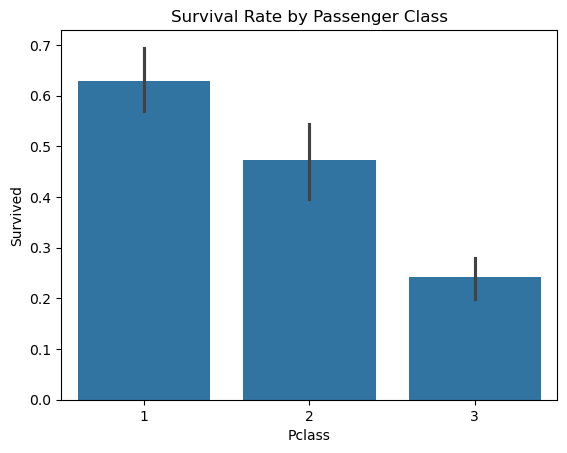

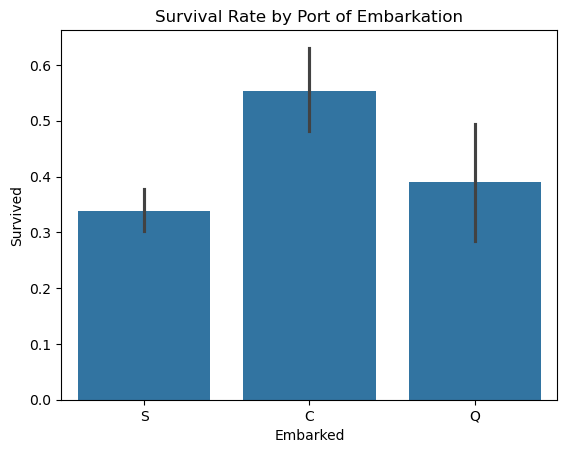

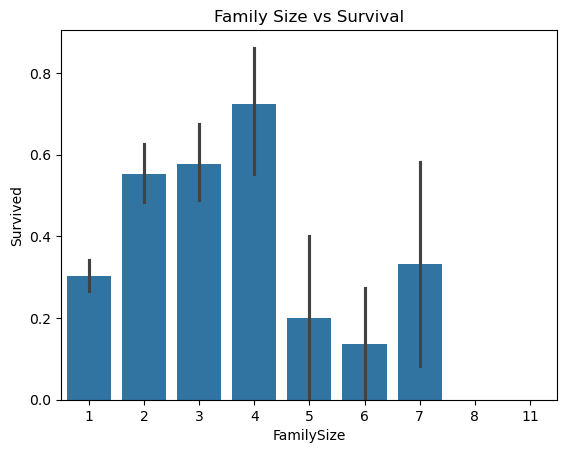

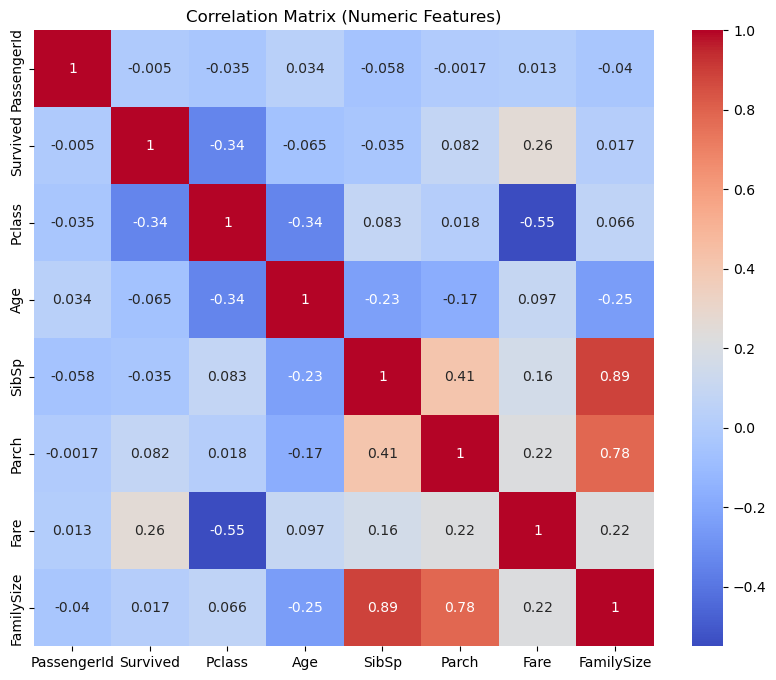

In [5]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 2. Load Dataset
# ================================
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic\train.csv")

# ================================
# 3. Basic Understanding
# ================================
print("Shape:", train.shape)
print("\nColumns:\n", train.columns)
print("\nFirst 5 rows:\n", train.head())
print("\nSummary Statistics:\n", train.describe())
print("\nMissing Values:\n", train.isnull().sum())

# ================================
# 4. Data Cleaning
# ================================

# Fill missing Age with median
train["Age"] = train["Age"].fillna(train["Age"].median())

# Fill missing Embarked with mode
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

# Drop Cabin column (too many missing values)
train = train.drop(columns=["Cabin"])

# Create FamilySize feature
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

print("\nMissing Values After Cleaning:\n", train.isnull().sum())

# ================================
# 5. Exploratory Data Analysis (EDA)
# ================================

# --- Age Distribution ---
plt.figure()
plt.hist(train["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()

# --- Survival by Gender ---
plt.figure()
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()

# --- Survival by Passenger Class ---
plt.figure()
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

# --- Survival by Embarked ---
plt.figure()
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

# --- Survival by Family Size ---
plt.figure()
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.title("Family Size vs Survival")
plt.show()

# ================================
# 6. Correlation Heatmap (NUMERIC ONLY)
# ================================
numeric_data = train.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()
